In [47]:
import requests
import json
import re
import pprint
pp = pprint.PrettyPrinter(indent=1)
import mwclient
import mwparserfromhell
from pydantic import BaseModel
from typing import List
!pip install nltk

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/owner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [64]:
SECTIONS_TO_IGNORE = [
    "See also",
    "References",
    "External links",
    "Further reading",
    "Footnotes",
    "Bibliography",
    "Sources",
    "Citations",
    "Literature",
    "Footnotes",
    "Notes and references",
    "Photo gallery",
    "Works cited",
    "Photos",
    "Gallery",
    "Notes",
    "References and sources",
    "References and notes",
]

class WikipediaAPI(BaseModel):
    def get_category_data(self, category: str) -> List:  # Wikimedia API Call for categories.
        URL = "https://en.wikipedia.org/w/api.php"
        PARAMS = {
            "action": "query",
            "list": "categorymembers",
            "cmtitle": category,
            "cmlimit": "max",
            "format": "json"
        }

        HEADERS = {
            'User-Agent': 'Myles Pember (https://github.com/wmp43/wikiSearch/tree/master; wmp43@cornell.edu)'
        }

        response = requests.get(url=URL, params=PARAMS, headers=HEADERS)
        data = response.json()
        # pretty_json = json.dumps(data, indent=4)
        # print(pretty_json)
        response_list = [(category[9:], member['title'], member["pageid"], member["ns"]) for member in
                         data['query']['categorymembers']]
        return response_list

    def fetch_article_data(self, article_title, ignore_titles:List):
        site = mwclient.Site('en.wikipedia.org')
        page = site.pages[article_title]

        # Dictionary to store section titles and their corresponding text
        sections = {}

        if page.exists:
            wikitext = page.text()
            parsed = mwparserfromhell.parse(wikitext)
    
            for section in parsed.get_sections(include_lead=True, flat=True):
                title = section.filter_headings()[0].title.strip() if section.filter_headings() else "Lead section"
    
                if title not in ignore_titles:
                    text = section.strip_code().strip()
                    sections[title] = text.replace('\n', '').replace('\t', '')
        else:
            print(f"The page '{article_title}' does not exist.")
        return sections

In [65]:
wikiapi = WikipediaAPI().fetch_article_data('Normal_distribution', SECTIONS_TO_IGNORE)

In [66]:
print(wikiapi)

{'Lead section': "In statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. The general form of its probability density function isThe parameter  is the mean or expectation of the distribution (and also its median and mode), while the parameter  is its standard deviation. The variance of the distribution is . A random variable with a Gaussian distribution is said to be normally distributed, and is called a normal deviate.Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.Normal Distribution, Gale Encyclopedia of Psychology Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a

In [28]:
text_l = []
for item, value in wikiapi.items():
    char_len, tokens = len(value), len(word_tokenize(value))
    text_l.append((char_len, tokens))

In [29]:
print(text_l)

[(2097, 350), (11, 1), (765, 140), (822, 143), (415, 75), (1042, 164), (183, 30), (1558, 262), (291, 49), (1456, 274), (844, 152), (1317, 205), (2287, 395), (1168, 211), (1442, 255), (849, 146), (496, 84), (160, 27), (540, 95), (1115, 202), (16, 2), (21, 2), (2635, 428), (766, 138), (1076, 184), (844, 149), (575, 92), (751, 120), (210, 33), (329, 51), (754, 125), (359, 62), (3563, 589), (21, 2), (563, 95), (1055, 193), (1630, 291), (1468, 260), (1813, 366), (1058, 180), (21, 4), (837, 159), (575, 123), (78, 14), (2282, 434), (723, 128), (3960, 705), (532, 79), (793, 135), (947, 149), (3142, 529), (1508, 232), (21, 2), (4696, 859), (3065, 514), (7, 1), (3499, 605), (1777, 349), (1101, 163), (5, 1), (10, 1), (9, 1), (283, 56), (255, 29)]


In [38]:
import matplotlib.pyplot as plt
import numpy as np

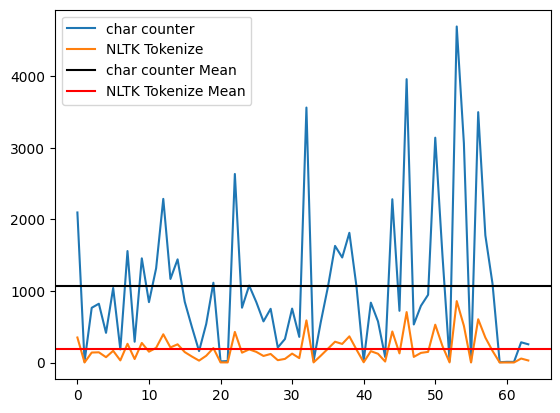

In [44]:
plt.plot([i[0] for i in text_l], label = 'char counter')
plt.plot([i[1] for i in text_l], label = 'NLTK Tokenize')
plt.axhline(np.mean([i[0] for i in text_l]), label = 'char counter Mean', linestyle='-', color = 'black')
plt.axhline(np.mean([i[1] for i in text_l]), label = 'NLTK Tokenize Mean', linestyle='-', color = 'r')
plt.legend()
plt.show()

In [45]:
print(np.mean([i[1] for i in text_l]))

185.84375
